### Library

In [19]:
import pandas as pd
import numpy as np
from numpy import array

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from mape import mean_absolute_percentage_error

from IPython.display import clear_output
from pandas import ExcelWriter

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import model_from_json
from keras.layers import Dropout

from data_reshape import univariate_reshape
from Remove_Duplicate import Remove

### Data Beban Historis

In [20]:
path = r'power_dataset.xlsx'
data = pd.read_excel (path)

### Data Parameter yang akan diuji

In [21]:
# path = r'ANN_timesteps.xlsx'
# df_par = pd.read_excel(path)

# path = r'ANN_features.xlsx'
# df_par = pd.read_excel(path)

path = r'ANN_hidden_layer.xlsx'
df_par = pd.read_excel(path)
df_par

,Unnamed: 0,dataset,timesteps,feature,hidden_layer,RMSE,MAPE
0,0,1,1,672,2,0,0
1,1,2,1,672,2,0,0
2,2,3,1,672,2,0,0
3,3,4,1,672,2,0,0
4,4,5,1,672,2,0,0
5,5,6,1,672,2,0,0
6,6,7,1,672,2,0,0
7,7,8,1,672,2,0,0
8,8,9,1,672,2,0,0
9,9,10,1,672,2,0,0


Nama file saat disimpan :

In [22]:
algorithm_name = 'Revisi ANN'
# parameter_name = 'timesteps'
# parameter_name = 'features'
parameter_name = 'hidden layer'

# variabel_list = df_par.timesteps.iloc[:]
# variabel_list = df_par.feature.iloc[:]
variabel_list = df_par.hidden_layer.iloc[:]
unique_variabel = Remove(variabel_list)
variabel = pd.DataFrame(columns = ['variabel'])
variabel.variabel = unique_variabel
variabel

,variabel
0,2
1,3


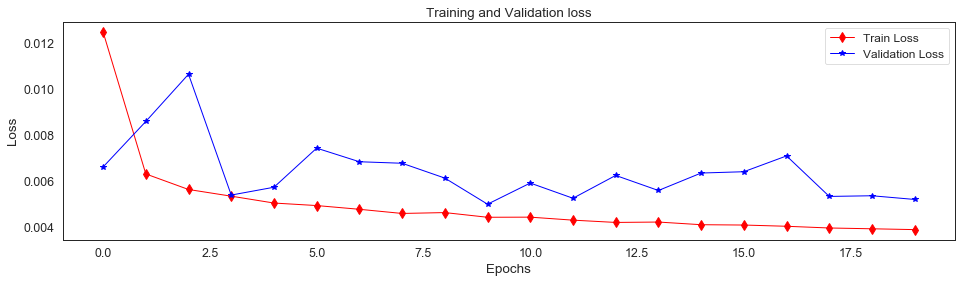

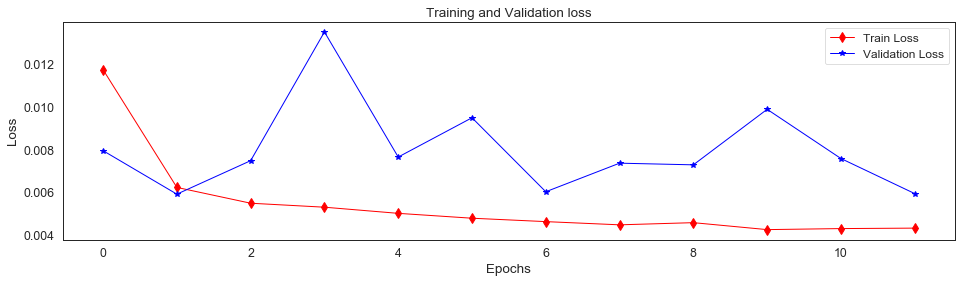

In [23]:
# Training & Save Model
r = 1
path = r'power_dataset.xlsx'
data = pd.read_excel (path)
batas_dataset = 60

dataset = data.power.iloc[:-batas_dataset*24*7]
dataset = pd.DataFrame(dataset)
target_dum = data.power.iloc[-batas_dataset*24*7:-(batas_dataset-1)*24*7]
target_dum = target_dum.reset_index(drop=True)

# Normalize Dataset 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

for d in range(len(variabel)) :
    
    print("Training Model {}/{}\n".format(r,len(variabel)))
    r = r+1

    in_steps = 1
#     in_steps = variabel.variabel.iloc[d]
    in_features = 672
#     in_features = variabel.variabel.iloc[d].tolist()
    out_steps = 168
    
    train_x,train_y, _ = univariate_reshape(dataset,in_steps,in_features,out_steps,target_dum)
    train_x = train_x.reshape(train_x.shape[0],train_x.shape[2])
    
     ##### Parameter ANN
    verbose = 1
    epochs = 500
    batch_size = 50
    neuron_layer_1 = in_features
    neuron_layer_2 = in_features
    neuron_layer_3 = in_features
    dropout_rate = 0.1

    print("Hidden Layer : {}\n".format(variabel.variabel.iloc[d]))
#     print("Hidden Layer : {}\n".format(df_par.hidden_layer.iloc[d]))

#     if df_par.hidden_layer.iloc[d] == 1:
    if variabel.variabel.iloc[d] == 1:
        # Model ANN
        model = Sequential()
        model.add(Dense(neuron_layer_1, input_dim=in_features, activation='relu'))
        model.add(Dropout(dropout_rate))
        model.add(Dense(out_steps))
#     elif df_par.hidden_layer.iloc[d] == 2:
    elif variabel.variabel.iloc[d] == 2:
        # Model ANN
        model = Sequential()
        model.add(Dense(neuron_layer_1, input_dim=in_features, activation='relu'))
        model.add(Dense(neuron_layer_1, input_dim=in_features, activation='relu'))
        model.add(Dropout(dropout_rate))
        model.add(Dense(out_steps))
#     elif df_par.hidden_layer.iloc[d] == 3:
    elif variabel.variabel.iloc[d] == 3:
        # Model ANN
        model = Sequential()
        model.add(Dense(neuron_layer_1, input_dim=in_features, activation='relu'))
        model.add(Dense(neuron_layer_1, input_dim=in_features, activation='relu'))
        model.add(Dense(neuron_layer_1, input_dim=in_features, activation='relu'))
        model.add(Dropout(dropout_rate))
        model.add(Dense(out_steps))

    model.compile(loss='mse', optimizer='adam')
    es = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',  restore_best_weights=True)
    history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=[es])

    # PLOT TRAIN and Validation LOSS
    sns.set_style('white')
    sns.set_context("paper", font_scale=1.4)  
    plt.figure(figsize=(16,4))
    plt.plot(history.history['loss'], color='r', linewidth=1, marker='d', markersize=7, label='Train Loss')
    plt.plot(history.history['val_loss'], color='b',linewidth=1, marker='*',markersize=6, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation loss')
    legend = plt.legend(loc='upper right',prop={'size': 12})
    plt.savefig('{} parameter {} model number {} - loss.png'.format(parameter_name, algorithm_name,d), dpi=500)

    # serialize model to JSON
    model_json = model.to_json()
    with open("{} parameter {} model number {}.json".format(parameter_name, algorithm_name,d), "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    model.save_weights("{} parameter {} model number {}.h5".format(parameter_name, algorithm_name,d))
    
    print("")
    print("Resetting Model..")
    model.reset_states()
    
    clear_output(wait=False)

In [24]:
j = 0

for i1 in range(len(variabel)) :
    
#     in_steps = variabel.variabel.iloc[i1]
    in_steps = 1
#     in_features = variabel.variabel.iloc[i1]
    in_features = 672

    out_steps = 168
    
    json_file = open("{} parameter {} model number {}.json".format(parameter_name, algorithm_name,i1), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model_ann = model_from_json(loaded_model_json)

    # load weights into new model
    model_ann.load_weights("{} parameter {} model number {}.h5".format(parameter_name, algorithm_name,i1))
    
    simpan_aktual = []
    simpan_prediksi = []
    
    for i2 in range(30):
        
        print("Testing Model {}/{}\n".format(j,len(df_par)))
        
        batas_bawah_target =  60 - i2
        batas_atas_target = batas_bawah_target-1
        target = data.power.iloc[-batas_bawah_target*24*7:-batas_atas_target*24*7]
        target = target.reset_index(drop=True)
        dataset_trg = data.power.iloc[:-batas_bawah_target*24*7]
        dataset_trg = pd.DataFrame(dataset_trg)
        
        # Normalize Dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset_trg = scaler.fit_transform(dataset_trg)
        _ , _ ,test_sample = univariate_reshape(dataset_trg,in_steps,in_features,out_steps,target)
        test_sample = test_sample.reshape(test_sample.shape[0],test_sample.shape[2])
        
        predict = model_ann.predict(test_sample)
        predict = scaler.inverse_transform(predict)
        
        simpan_aktual.append(target.values)
        simpan_prediksi.append(predict[0])
        
        if i2 == 29 :
            sp = np.array(simpan_prediksi)
            sp = sp.flatten()
            sa = np.array(simpan_aktual)
            sa = sa.flatten()

            simpan_total = pd.DataFrame(columns = ['Aktual','Prediksi'])
            simpan_total.Aktual = sa
            simpan_total.Prediksi = sp
            
            writer = ExcelWriter('{} {} actual dan prediksi {} .xlsx'.format(algorithm_name,parameter_name,i1))
            simpan_total.to_excel(writer,'Sheet1')
            writer.save()
        
        
#         #DATA PREDICTION
#         plt.figure(figsize=(16,5))
#         plt.plot(predict[0], label = "Prediction")
#         plt.plot(target, label = "Actual Data")
#         plt.tick_params(left=False, labelleft=True) #remove ticks
#         plt.tight_layout()
#         sns.despine(top=True)
#         plt.subplots_adjust(left=0.07)
#         plt.xlabel('Time Index')
#         plt.ylabel('Power Consumption')
#         plt.legend(loc='upper right')
#         plt.title('Prediction Plot')
#         plt.savefig('{} parameter {} model number {} - Prediction Plot.png'.format(parameter_name, algorithm_name,j), dpi=500)

        #Mengisi dataframe
        df_par.RMSE.iloc[j] = np.sqrt(mean_squared_error(target,predict[0]))
        df_par.MAPE.iloc[j] = mean_absolute_percentage_error(target,predict[0])
        
#         from pandas import ExcelWriter
#         writer = ExcelWriter('{} {} Parameter Autosave Progress.xlsx'.format(algorithm_name,parameter_name))
#         df_par.to_excel(writer,'Sheet1')
#         writer.save()
        
        j = j+1
        clear_output(wait=False)

In [25]:
# path = r'Revisi ANN features actual dan prediksi 0 .xlsx'
# data0 = pd.read_excel (path)
# d1 = data0.Prediksi

# path = r'Revisi ANN features actual dan prediksi 1 .xlsx'
# data1 = pd.read_excel (path)
# d2 = data1.Prediksi

# path = r'Revisi ANN features actual dan prediksi 2 .xlsx'
# data2 = pd.read_excel (path)
# d3 = data2.Prediksi

# path = r'Revisi ANN features actual dan prediksi 3 .xlsx'
# data3 = pd.read_excel (path)
# d4 = data3.Prediksi

# dact = data1.Aktual

# mape1 = mean_absolute_percentage_error(dact,d1)
# rmse1 = np.sqrt(mean_squared_error(dact,d1))

# mape2 = mean_absolute_percentage_error(dact,d2)
# rmse2 = np.sqrt(mean_squared_error(dact,d2))

# mape3 = mean_absolute_percentage_error(dact,d3)
# rmse3 = np.sqrt(mean_squared_error(dact,d3))

# mape4 = mean_absolute_percentage_error(dact,d4)
# rmse4 = np.sqrt(mean_squared_error(dact,d4))

# print('Nilai MAPE {} 168 adalah {} %, Nilai RMSE {} 168 adalah {} MW'.format(parameter_name,mape1,parameter_name,rmse1) )
# print('Nilai MAPE {} 336 adalah {} %, Nilai RMSE {} 336 adalah {} MW'.format(parameter_name,mape2,parameter_name,rmse2) )
# print('Nilai MAPE {} 504 adalah {} %, Nilai RMSE {} 504 adalah {} MW'.format(parameter_name,mape3,parameter_name,rmse3) )
# print('Nilai MAPE {} 672 adalah {} %, Nilai RMSE {} 672 adalah {} MW'.format(parameter_name,mape4,parameter_name,rmse4) )

In [26]:
path = r'Revisi ANN hidden layer actual dan prediksi 0 .xlsx'
data0 = pd.read_excel (path)
d1 = data0.Prediksi

path = r'Revisi ANN hidden layer actual dan prediksi 1 .xlsx'
data1 = pd.read_excel (path)
d2 = data1.Prediksi

dact = data1.Aktual

mape1 = mean_absolute_percentage_error(dact,d1)
rmse1 = np.sqrt(mean_squared_error(dact,d1))

mape2 = mean_absolute_percentage_error(dact,d2)
rmse2 = np.sqrt(mean_squared_error(dact,d2))

print('Nilai MAPE {} 2 adalah {} %, Nilai RMSE {} 2 adalah {} MW'.format(parameter_name,mape1,parameter_name,rmse1) )
print('Nilai MAPE {} 3 adalah {} %, Nilai RMSE {} 3 adalah {} MW'.format(parameter_name,mape2,parameter_name,rmse2) )

Nilai MAPE hidden layer 2 adalah 5.811395760462115 %, Nilai RMSE hidden layer 2 adalah 17.263993386950503 MW
Nilai MAPE hidden layer 3 adalah 5.885480925505793 %, Nilai RMSE hidden layer 3 adalah 17.37064499278212 MW
